In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_excel('ukmidyearestimates20192020ladcodes.xls', sheet_name='MYE 5')

df = df.dropna(how='all', thresh=2)

df = df.drop(1)

df.columns = df.loc[3]

df = df.drop(3)

df.columns.name = None

In [4]:
df = df.set_index('Code')

In [5]:
df = df.sort_index()

In [6]:
df = df[df.columns[:5]]

In [7]:
df['Geography1'].value_counts()

Non-metropolitan District    188
Unitary Authority             79
Metropolitan District         36
London Borough                33
Council Area                  32
County                        25
Local Government District     11
Region                         9
Country                        7
Metropolitan County            6
Name: Geography1, dtype: int64

In [8]:
regions = df[df['Geography1'] == 'Region']

In [9]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, E12000001 to E12000009
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           9 non-null      object
 1   Geography1                     9 non-null      object
 2   Area (sq km)                   9 non-null      object
 3   Estimated Population mid-2019  9 non-null      object
 4   2019 people per sq. km         9 non-null      object
dtypes: object(5)
memory usage: 432.0+ bytes


In [10]:
regions[regions.columns[2:]] = regions[regions.columns[2:]].astype(int)

/Users/Nathan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, E12000001 to E12000009
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           9 non-null      object
 1   Geography1                     9 non-null      object
 2   Area (sq km)                   9 non-null      int64 
 3   Estimated Population mid-2019  9 non-null      int64 
 4   2019 people per sq. km         9 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 432.0+ bytes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, E06000001 to W92000004
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           426 non-null    object
 1   Geography1                     426 non-null    object
 2   Area (sq km)                   426 non-null    object
 3   Estimated Population mid-2019  426 non-null    object
 4   2019 people per sq. km         426 non-null    object
dtypes: object(5)
memory usage: 20.0+ KB


In [13]:
df = pd.read_excel('publishedweek4320202.xlsx', sheet_name='Covid-19 - Daily occurrences')

df = df.dropna(how='all', thresh=2)

df.columns = df.iloc[0]

df = df.drop(index=2).reset_index().drop('index', axis=1)

df.columns.name=None

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df[df.columns[1:]] = df[df.columns[1:]].astype(int)

In [14]:
cum_deaths = df.sum()

In [15]:
cum_deaths.index = list(map(lambda x:x.upper(), cum_deaths.index))

In [16]:
cum_deaths.name = 'Cumulative Deaths'

In [17]:
cum_deaths[6:]

NORTH EAST                  3218
NORTH WEST                  9105
YORKSHIRE AND THE HUMBER    5383
EAST MIDLANDS               4240
WEST MIDLANDS               6238
EAST                        5297
LONDON                      8803
SOUTH EAST                  7614
SOUTH WEST                  3017
Name: Cumulative Deaths, dtype: int64

In [18]:
regions = regions.merge(cum_deaths[6:], left_on='Name', right_index=True)

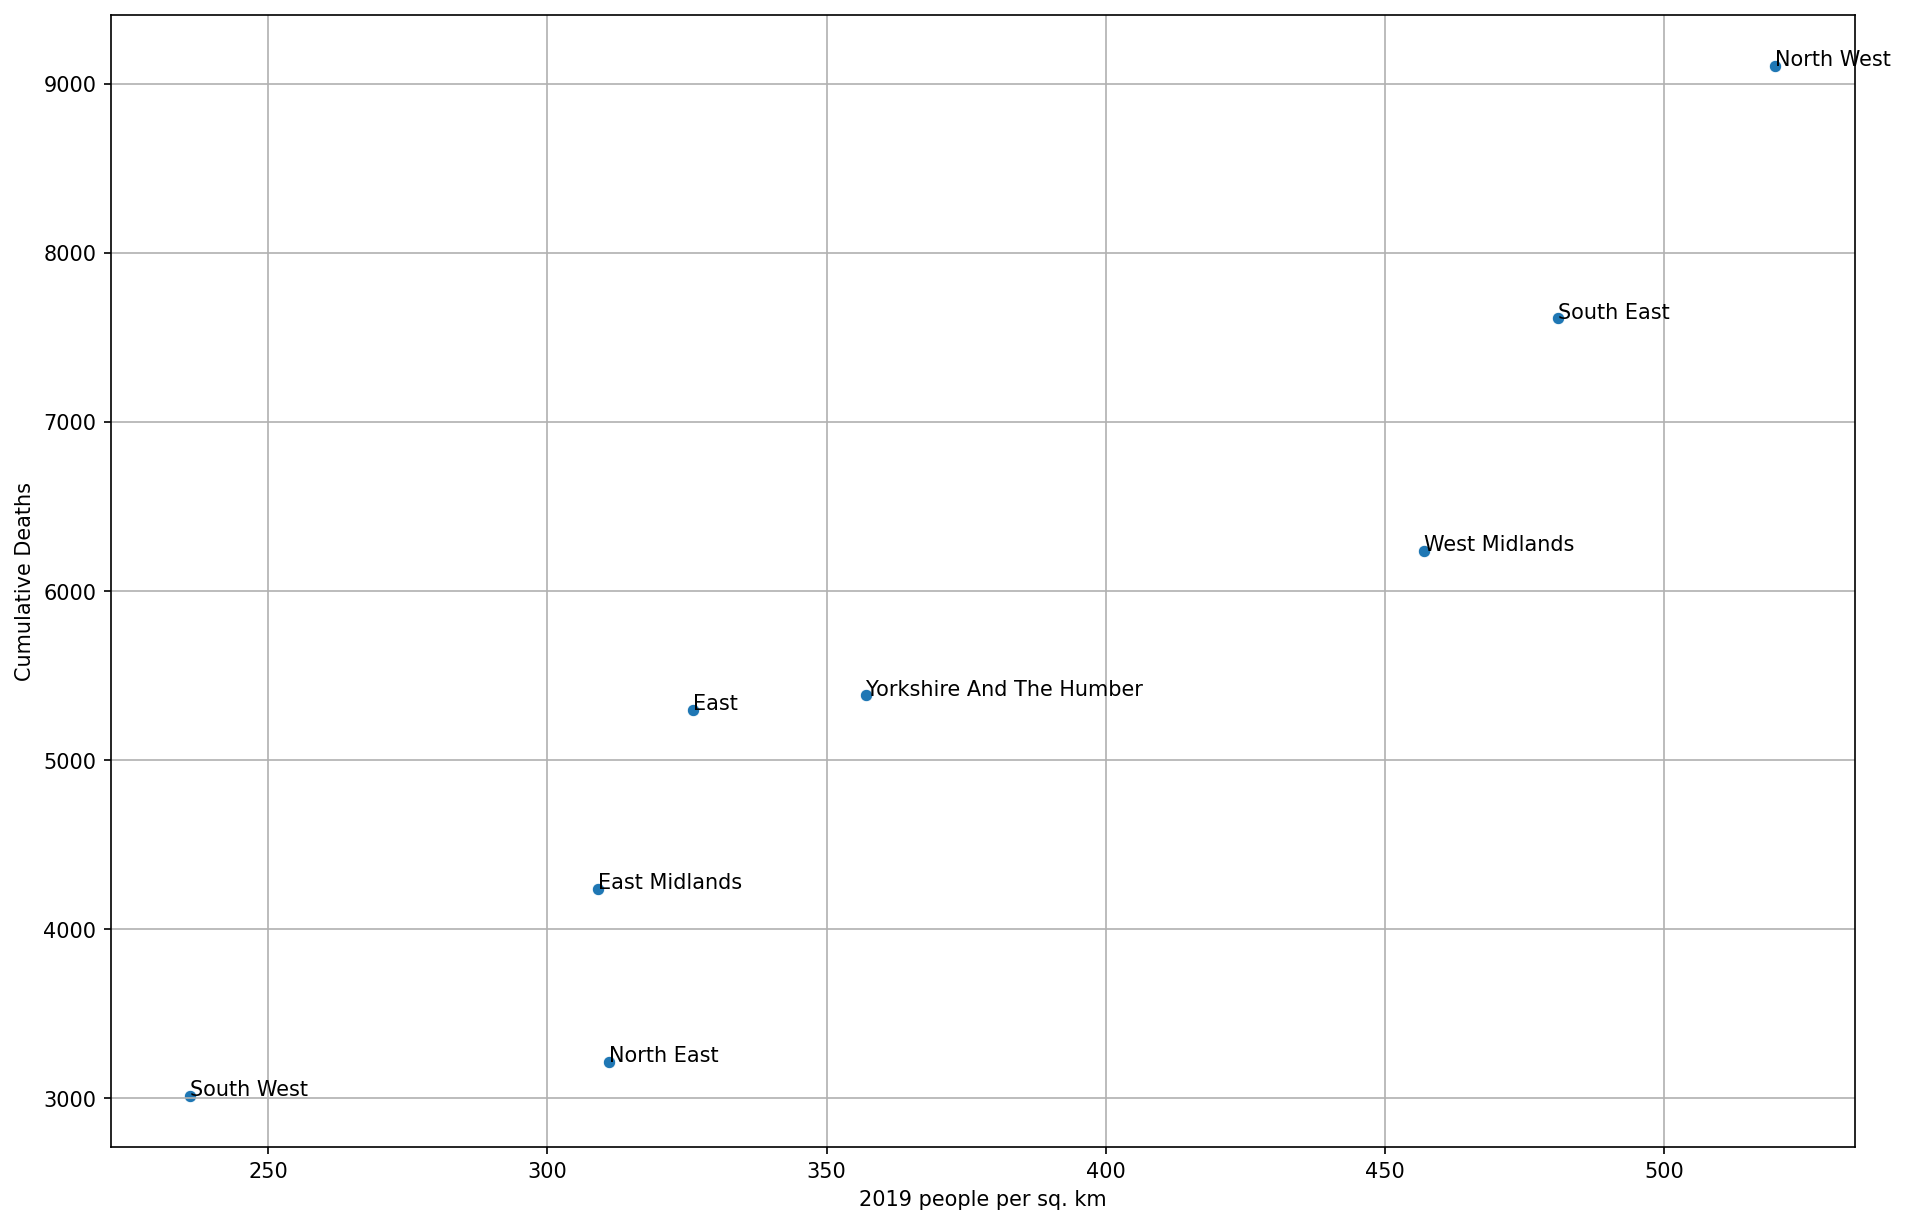

In [19]:
plt.figure(figsize=(15,10), dpi=150)
sns.scatterplot(data=regions.drop('E12000007'), x = '2019 people per sq. km', y = 'Cumulative Deaths')
for region, x, y in zip(regions['Name'],regions['2019 people per sq. km'], regions['Cumulative Deaths']):
    if region == 'LONDON':
        continue
    plt.annotate(region.title(), (x, y))
plt.grid(True)

In [20]:
regions['Deaths per million'] = round(regions['Cumulative Deaths'] / (regions['Estimated Population mid-2019']/pow(10,6)), 0)

In [21]:
regions['Deaths per million'] = regions['Deaths per million'].astype(int)

In [22]:
regions

,Name,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,Cumulative Deaths,Deaths per million
Code,,,,,,,
E12000001,NORTH EAST,Region,8579,2669941,311,3218,1205
E12000002,NORTH WEST,Region,14108,7341196,520,9105,1240
E12000003,YORKSHIRE AND THE HUMBER,Region,15405,5502967,357,5383,978
E12000004,EAST MIDLANDS,Region,15625,4835928,309,4240,877
E12000005,WEST MIDLANDS,Region,12998,5934037,457,6238,1051
E12000006,EAST,Region,19116,6236072,326,5297,849
E12000007,LONDON,Region,1572,8961989,5701,8803,982
E12000008,SOUTH EAST,Region,19072,9180135,481,7614,829
E12000009,SOUTH WEST,Region,23836,5624696,236,3017,536


In [23]:
regions = regions.sort_values('Deaths per million')

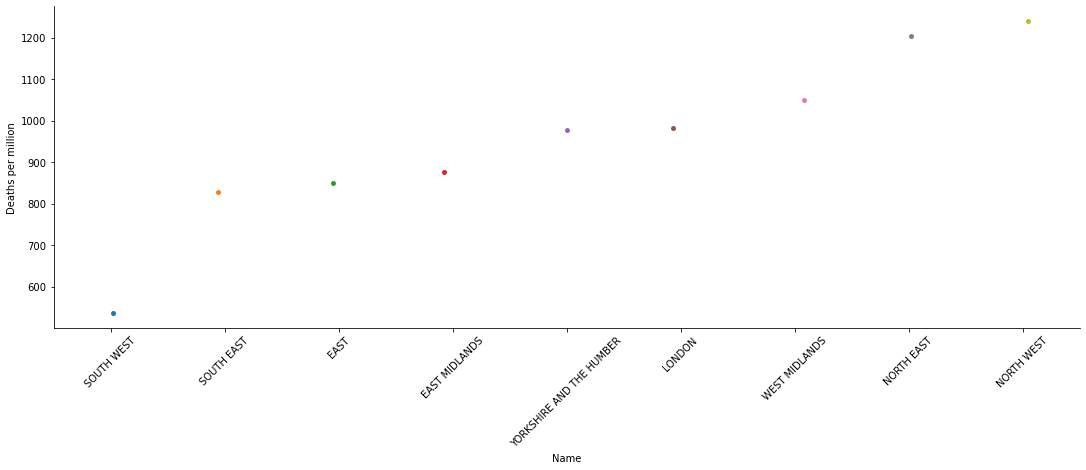

In [24]:
sns.catplot(data=regions, x='Name', y='Deaths per million', aspect=3).set_xticklabels(rotation=45)

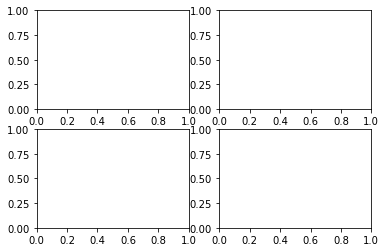

In [25]:
fig, axes = plt.subplots(2,2)

In [26]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<AxesSubplot:label='ef2675d0-edfc-4750-bcf6-908b749290ea', xlabel='Name', ylabel='2019 people per sq. km'>

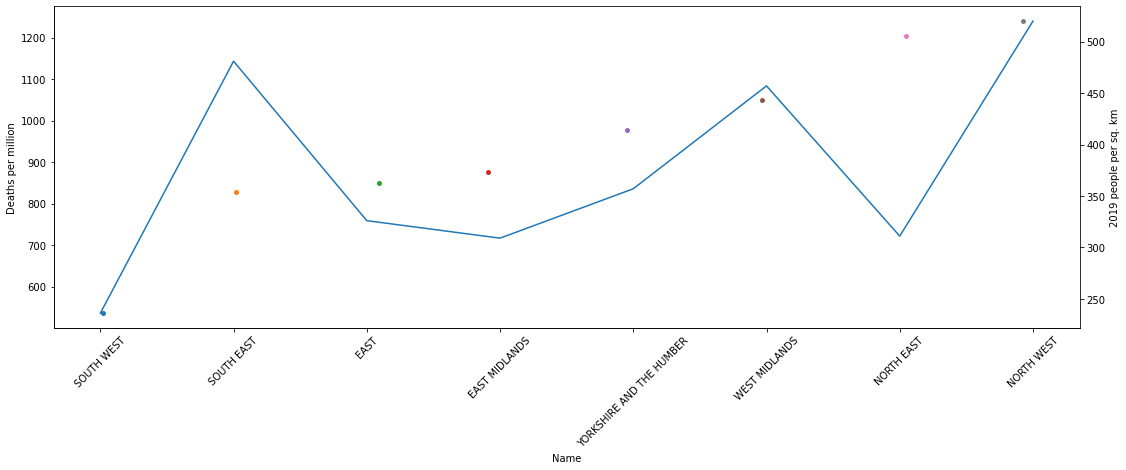

In [27]:
g = sns.catplot(data=regions.drop('E12000007'), x='Name', y='Deaths per million', aspect=3, c='blue').set_xticklabels(rotation=45)
ax1 = g.ax
ax2 = ax1.twinx()
sns.lineplot(data=regions.drop('E12000007'), x='Name', y='2019 people per sq. km', ax=ax2)

In [28]:
ax2

<AxesSubplot:label='ef2675d0-edfc-4750-bcf6-908b749290ea', xlabel='Name', ylabel='2019 people per sq. km'>

In [29]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [30]:
regions

,Name,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,Cumulative Deaths,Deaths per million
Code,,,,,,,
E12000009,SOUTH WEST,Region,23836,5624696,236,3017,536
E12000008,SOUTH EAST,Region,19072,9180135,481,7614,829
E12000006,EAST,Region,19116,6236072,326,5297,849
E12000004,EAST MIDLANDS,Region,15625,4835928,309,4240,877
E12000003,YORKSHIRE AND THE HUMBER,Region,15405,5502967,357,5383,978
E12000007,LONDON,Region,1572,8961989,5701,8803,982
E12000005,WEST MIDLANDS,Region,12998,5934037,457,6238,1051
E12000001,NORTH EAST,Region,8579,2669941,311,3218,1205
E12000002,NORTH WEST,Region,14108,7341196,520,9105,1240


<AxesSubplot:>

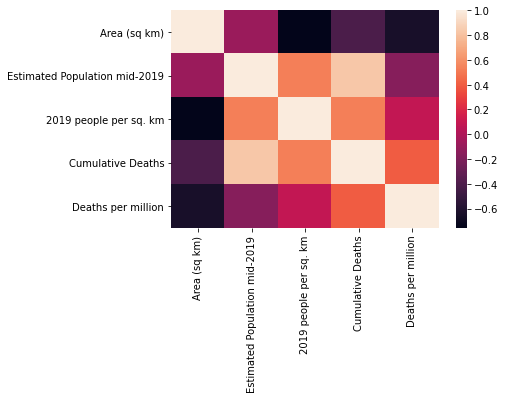

In [31]:
sns.heatmap(data=regions[regions.columns[2:]].corr())

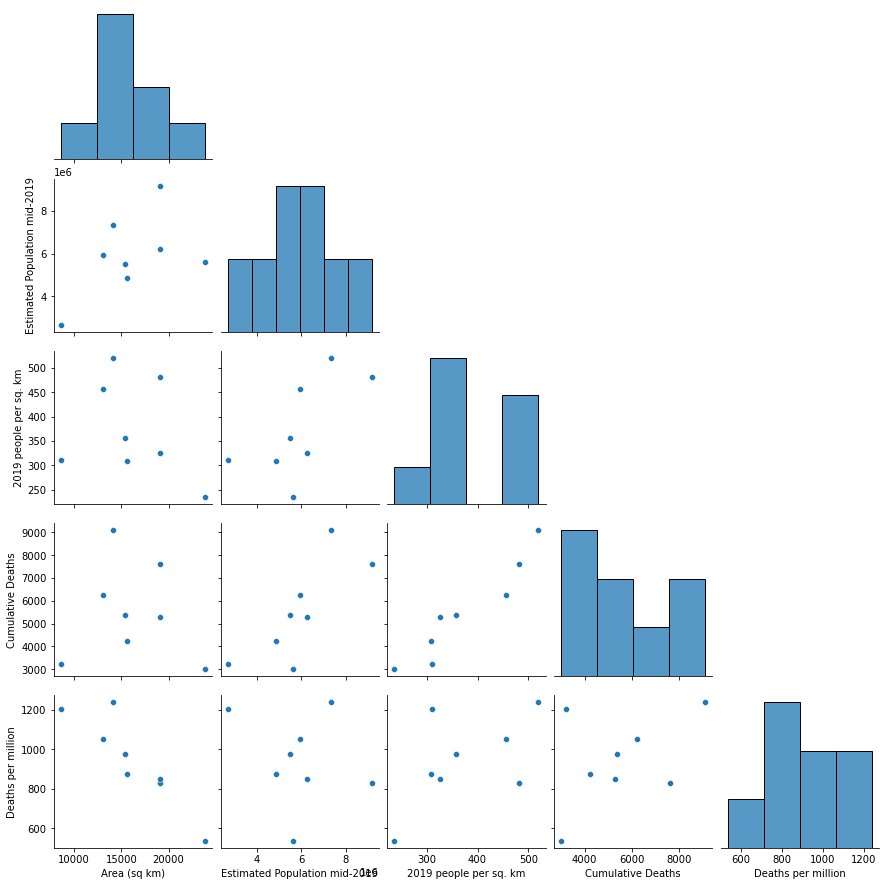

In [32]:
sns.pairplot(data=regions.drop('E12000007'), corner=True)

<AxesSubplot:label='b4e9d870-2c79-4d8b-8f72-371c62263c3e', xlabel='Name', ylabel='Deaths per million'>

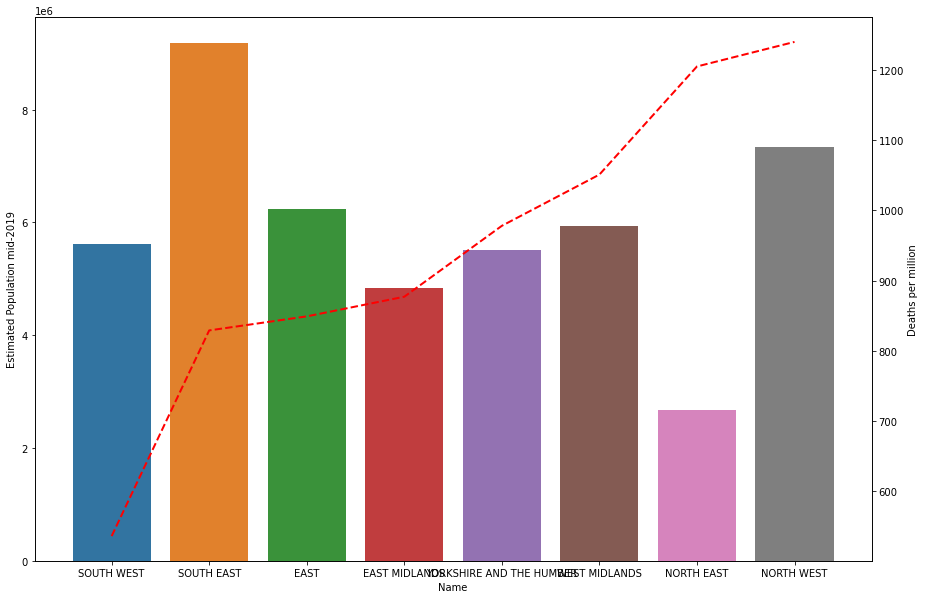

In [33]:
plt.figure(figsize=(15,10))
g = sns.barplot(data=regions.drop('E12000007'), x='Name', y=regions.columns[3])
ax2=g.twinx()
sns.lineplot(data=regions.drop('E12000007'), x='Name', y=regions.columns[6], ax=ax2, color='red', lw=2, ls='--', markers=True)

In [42]:
regions

,Name,Geography1,Area (sq km),Estimated Population mid-2019,2019 people per sq. km,Cumulative Deaths,Deaths per million
Code,,,,,,,
E12000009,SOUTH WEST,Region,23836,5624696,236,3017,536
E12000008,SOUTH EAST,Region,19072,9180135,481,7614,829
E12000006,EAST,Region,19116,6236072,326,5297,849
E12000004,EAST MIDLANDS,Region,15625,4835928,309,4240,877
E12000003,YORKSHIRE AND THE HUMBER,Region,15405,5502967,357,5383,978
E12000007,LONDON,Region,1572,8961989,5701,8803,982
E12000005,WEST MIDLANDS,Region,12998,5934037,457,6238,1051
E12000001,NORTH EAST,Region,8579,2669941,311,3218,1205
E12000002,NORTH WEST,Region,14108,7341196,520,9105,1240


In [43]:
df

,Date,UK,England and Wales,England,Scotland,Wales,Northern Ireland,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West
0,2020-01-30,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2020-02-02,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2020-02-22,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0
3,2020-03-02,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-10-19,181,159,147,16,12,6,20,51,29,9,11,5,9,10,3
235,2020-10-20,188,171,164,13,7,4,19,56,31,16,14,13,5,8,2
236,2020-10-21,191,181,171,6,10,4,17,60,36,8,13,7,12,11,7
237,2020-10-22,176,170,145,4,25,2,19,45,20,16,19,4,8,8,6
